In [1]:
import CalculatedFieldSubroutines as cfs

#

import numpy as np

import pandas as pd

#

import matplotlib.pyplot as plt

from pandasgui import show

#

import warnings

In [2]:
warnings.filterwarnings( 'ignore' )

In [3]:
gmID_list = cfs.list_whitelisted_gmIDs()

topic_list = cfs.list_topics()

print( topic_list )

['/apollo/canbus/chassis', '/apollo/drive/event', '/apollo/sensor/gnss/best/pose', '/apollo/perception/traffic/light']


In [4]:
combined_dfs = []

for gmID in gmID_list:

    if ( cfs.give_route( gmID ) != 'Red' ):

        continue

    chassis_df = cfs.retrieve_gmID_topic( gmID, '/apollo/canbus/chassis' )

    best_pose_df = cfs.retrieve_gmID_topic( gmID, '/apollo/sensor/gnss/best/pose' )

    chassis_df.sort_values( 'time' )

    best_pose_df.sort_values( 'time' )

    #

    cfs.BinaryDrivingMode( chassis_df )

    cfs.TernaryDrivingModeTransition( chassis_df )

    cfs.DistanceToNearestDisengagement( chassis_df )

    #

    cfs.LatLonTotalStdDev( best_pose_df )

    cfs.ProgressAlongRoute_v2( best_pose_df )

    #

    cfs.ChassisBestPoseMatchedTime( chassis_df, best_pose_df )

    #

    combined_df = pd.merge( chassis_df, best_pose_df, on = 'ChassisBestPoseMatchedTime', how = 'inner' )

    #

    combined_df = combined_df[ [ 'brakePercentage', 'speedMps', 'time_x', 'throttlePercentage', 'steeringPercentage', \
                                 'TernaryDrivingModeTransition', 'DistanceToNearestDisengagement', 'NearestDisengagementID', \
                                 'longitude', 'latitude', 'LatLonTotalStdDev', 'ProgressAlongRoute', 'PartitionNumber' ] ]

    combined_dfs.append( combined_df )

In [5]:
combined_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50225 entries, 0 to 50224
Data columns (total 13 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   brakePercentage                 50225 non-null  float64
 1   speedMps                        50225 non-null  float64
 2   time_x                          50225 non-null  int64  
 3   throttlePercentage              50225 non-null  float64
 4   steeringPercentage              50225 non-null  float64
 5   TernaryDrivingModeTransition    50225 non-null  int64  
 6   DistanceToNearestDisengagement  50225 non-null  float64
 7   NearestDisengagementID          50225 non-null  object 
 8   longitude                       50225 non-null  float64
 9   latitude                        50225 non-null  float64
 10  LatLonTotalStdDev               50225 non-null  float64
 11  ProgressAlongRoute              50225 non-null  float64
 12  PartitionNumber                 

In [6]:
combined_df_all = pd.concat( combined_dfs )

In [7]:
combined_df_all_sliced = combined_df_all[ ( combined_df_all[ 'ProgressAlongRoute' ] > 0.37 ) & 
                                          ( combined_df_all[ 'ProgressAlongRoute' ] < 0.41 ) ]

In [8]:
combined_df_all_disengagements = combined_df_all[ combined_df_all[ 'TernaryDrivingModeTransition' ] == -1 ]

combined_df_all_disengagements_sliced = combined_df_all_sliced[ combined_df_all_sliced[ 'TernaryDrivingModeTransition' ] == -1 ]

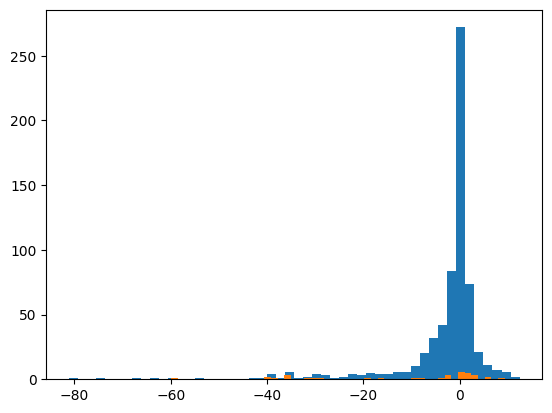

In [9]:
plt.hist( combined_df_all_disengagements[ 'steeringPercentage' ], bins = 50 )

plt.hist( combined_df_all_disengagements_sliced[ 'steeringPercentage' ], bins = 50 )

plt.show()

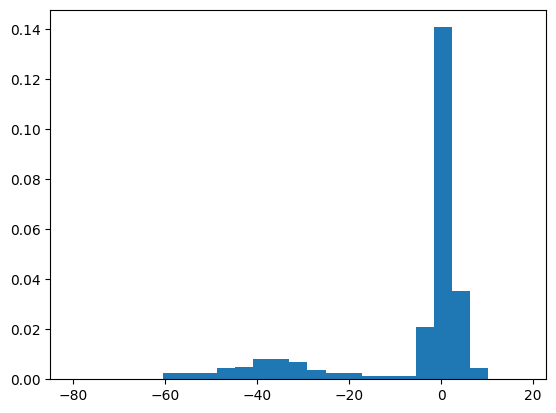

In [10]:
plt.hist( combined_df_all_sliced[ 'steeringPercentage' ], bins = 25, density = True )

plt.show()

In [13]:
show( combined_df_all_sliced )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


In [12]:
show( combined_dfs[ 0 ] )

PandasGUI INFO — pandasgui.gui — Opening PandasGUI
